In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [10]:
X,y = make_circles(n_samples =100, noise=0.1, random_state =1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.20, random_state=2)

In [12]:
model = Sequential()
model.add(Dense(256,  input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 3500, verbose=0)

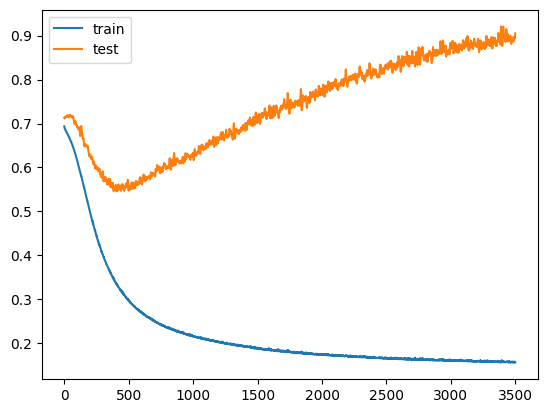

In [15]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'],label= 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


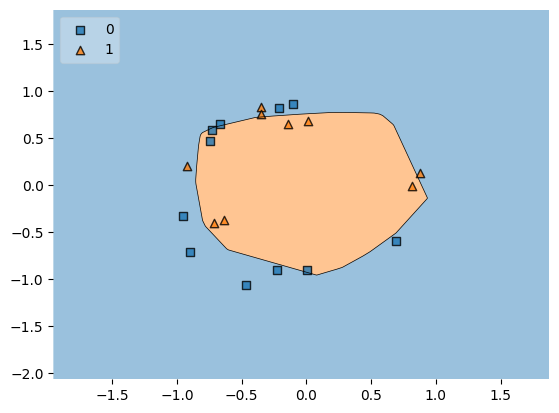

In [17]:
plot_decision_regions(X_test, y_test.ravel(),clf = model, legend =2)
plt.show()

In [18]:
#EArly stoppign

model = Sequential ()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience =20,
    verbose =1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [21]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =3500, callbacks = callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4898 - loss: 0.6972 - val_accuracy: 0.4000 - val_loss: 0.7062
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5266 - loss: 0.6956 - val_accuracy: 0.4000 - val_loss: 0.7070
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4930 - loss: 0.6945 - val_accuracy: 0.4000 - val_loss: 0.7095
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4883 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.7121
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5406 - loss: 0.6900 - val_accuracy: 0.4000 - val_loss: 0.7146
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5445 - loss: 0.6910 - val_accuracy: 0.3500 - val_loss: 0.7166
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5422 - loss: 0.6880 - val_accuracy: 0.4000 - val_loss: 0.7176
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5445 - loss: 0.6859 - val_accuracy: 0.4000 - 

TypeError: 'History' object is not subscriptable

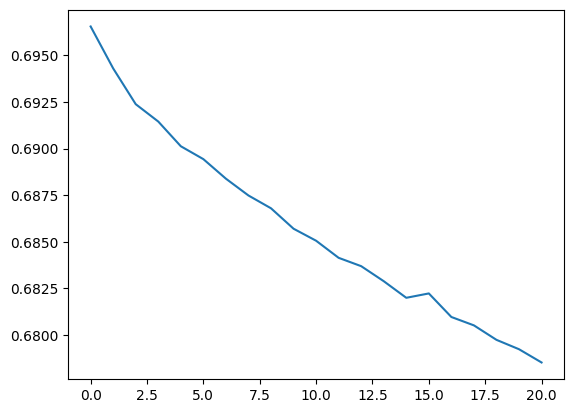

In [22]:
plt.plot(history.history['loss'], label= 'train')
plt.plot(history,history['val_loss'], label = 'test')
plt.legend()
plt.show()